In [70]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy

##### Se cargan los archivos parquet

In [76]:
train = pd.read_parquet('train.parquet', engine= 'pyarrow')

In [77]:
train.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


In [78]:
train.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


In [79]:
train.shape

(346479, 22)

In [80]:
train.dtypes

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

In [81]:
# valores diferentes de cada columna y cuantos registros tienen 
train['laundry_options'].value_counts()

w/d in unit           118627
w/d hookups            67941
laundry on site        52949
laundry in bldg        32513
no laundry on site      3278
Name: laundry_options, dtype: int64

(0.0, 1000000000.0)

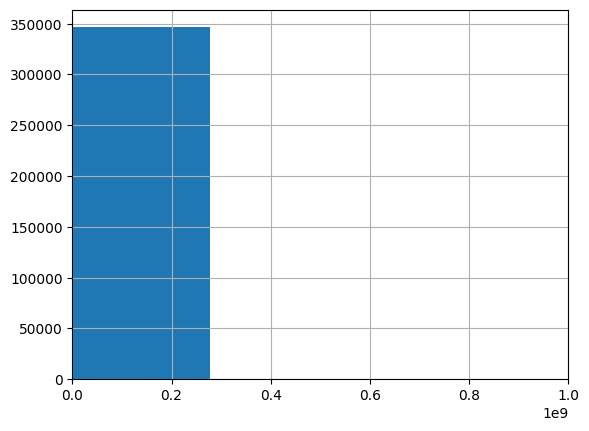

In [82]:
# gráfica de precios, antes de categorizarla
train['price'].hist(bins=10)
plt.ylim(0,)
plt.xlim(0, 1000000000)

In [83]:
# datos del registro que tiene el valor mínimo de la columna 'price'
train.loc[train.price.idxmin()]

id                                                                7045212389
url                        https://saltlakecity.craigslist.org/apa/d/midv...
region                                                        salt lake city
region_url                               https://saltlakecity.craigslist.org
price                                                                      0
type                                                               apartment
sqfeet                                                                  1122
beds                                                                       2
baths                                                                    2.0
cats_allowed                                                               0
dogs_allowed                                                               0
smoking_allowed                                                            1
wheelchair_access                                                          0

In [84]:
# propiedades cuyo precio es 0
gratis = train[train['price'] == 0]
len(gratis)

1175

In [85]:
# se eliminan los registros cuyo precio es 0
train.drop(train[(train['price'] == 0)].index, inplace=True)


In [86]:
# se verifica
gratis = train[train['price'] == 0]
len(gratis)

0

In [87]:
# propiedades cuyo precio es menor que 100
menor_100 = train[train['price'] < 100]
len(menor_100)

814

In [88]:
# diferentes precios en orden
lista = train['price'].unique().tolist()
sorted(lista)
 

[1,
 2,
 5,
 8,
 9,
 10,
 11,
 14,
 15,
 16,
 17,
 20,
 22,
 23,
 25,
 26,
 30,
 32,
 35,
 39,
 40,
 45,
 50,
 55,
 59,
 60,
 61,
 65,
 69,
 70,
 75,
 79,
 81,
 85,
 86,
 88,
 89,
 90,
 94,
 95,
 97,
 99,
 100,
 106,
 107,
 109,
 110,
 113,
 114,
 115,
 120,
 123,
 124,
 125,
 130,
 135,
 140,
 144,
 145,
 149,
 150,
 151,
 159,
 160,
 164,
 165,
 168,
 170,
 172,
 175,
 179,
 180,
 184,
 185,
 186,
 190,
 195,
 196,
 197,
 199,
 200,
 204,
 205,
 206,
 209,
 210,
 214,
 215,
 217,
 219,
 220,
 221,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 235,
 239,
 240,
 244,
 245,
 246,
 249,
 250,
 252,
 253,
 254,
 255,
 256,
 258,
 259,
 260,
 264,
 265,
 268,
 269,
 270,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 289,
 290,
 291,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 305,
 306,
 307,
 309,
 310,
 311,
 312,
 314,
 315,
 316,
 318,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 335,
 336,
 337,
 338,
 339,
 34

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqfeet'}>,
        <AxesSubplot:title={'center':'beds'}>],
       [<AxesSubplot:title={'center':'baths'}>,
        <AxesSubplot:title={'center':'cats_allowed'}>,
        <AxesSubplot:title={'center':'dogs_allowed'}>,
        <AxesSubplot:title={'center':'smoking_allowed'}>],
       [<AxesSubplot:title={'center':'wheelchair_access'}>,
        <AxesSubplot:title={'center':'electric_vehicle_charge'}>,
        <AxesSubplot:title={'center':'comes_furnished'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

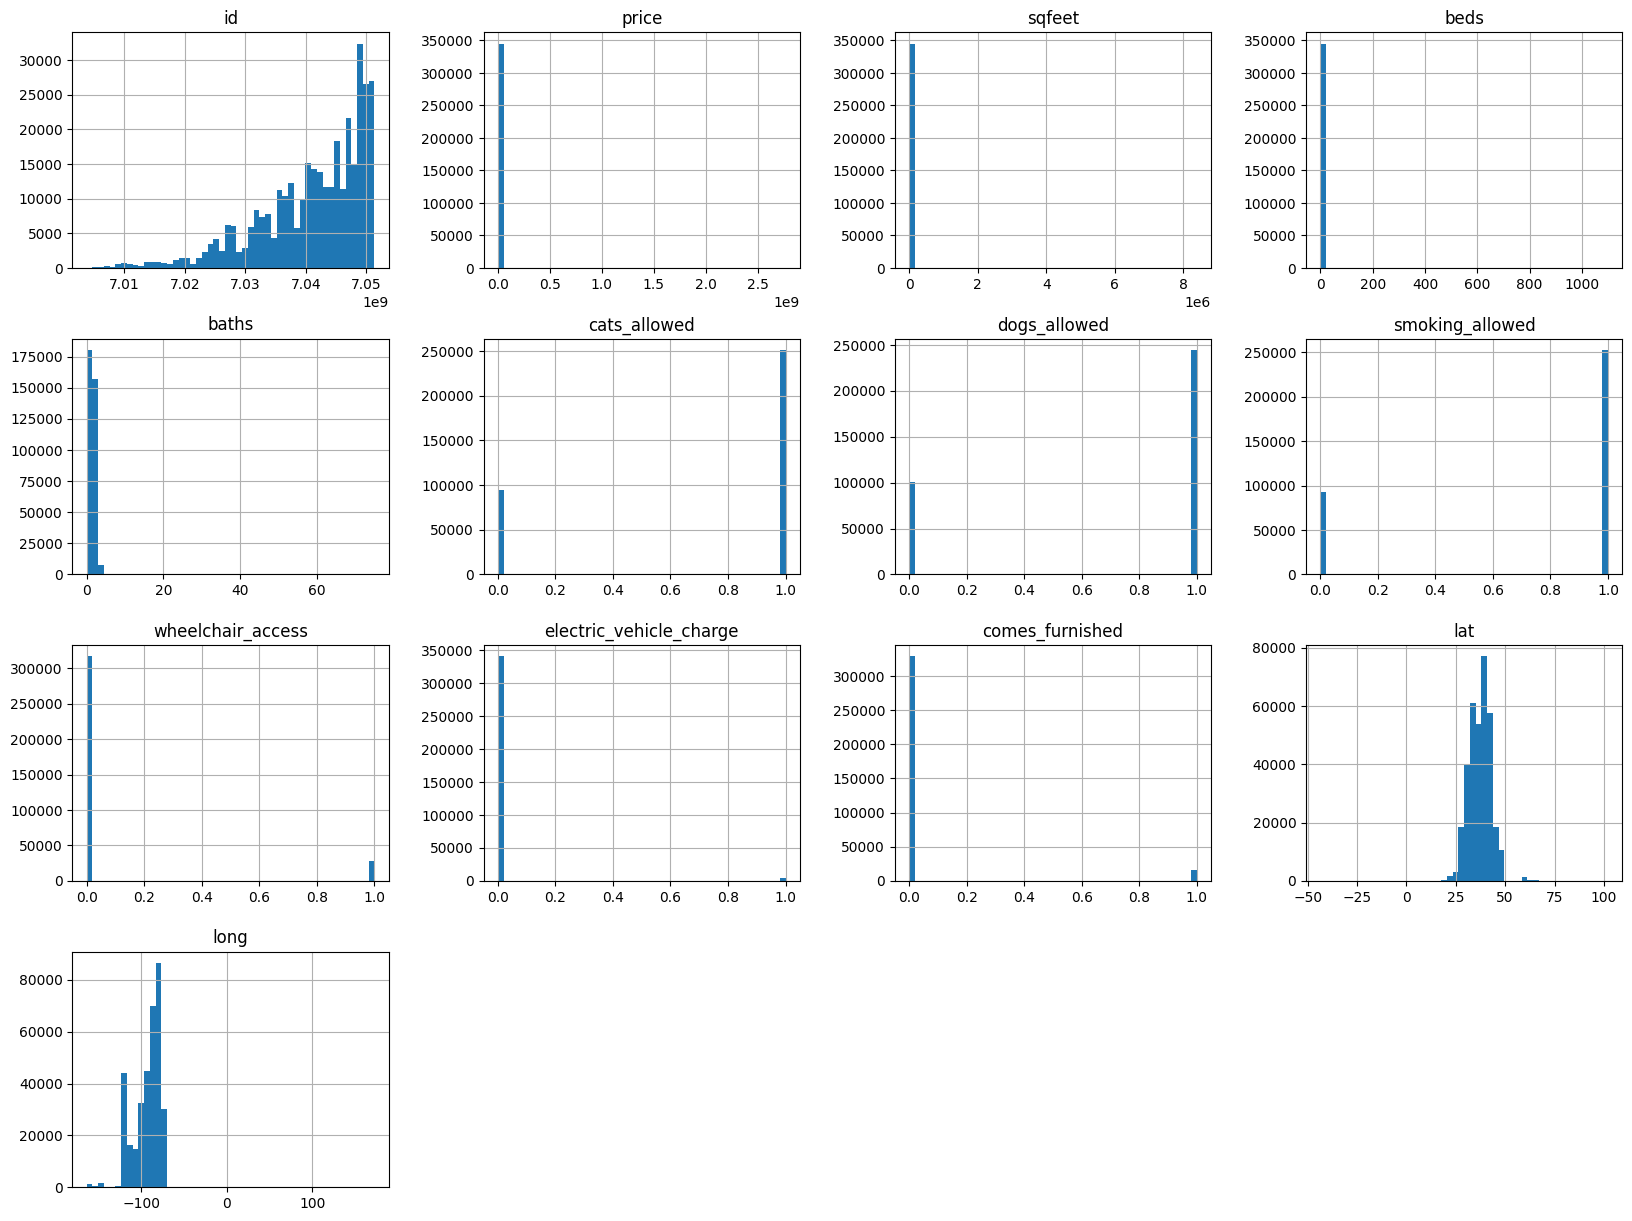

In [89]:
# histogramas de las diferentes columnas
train.hist(bins=50, figsize=(20,15))

<AxesSubplot:xlabel='long', ylabel='lat'>

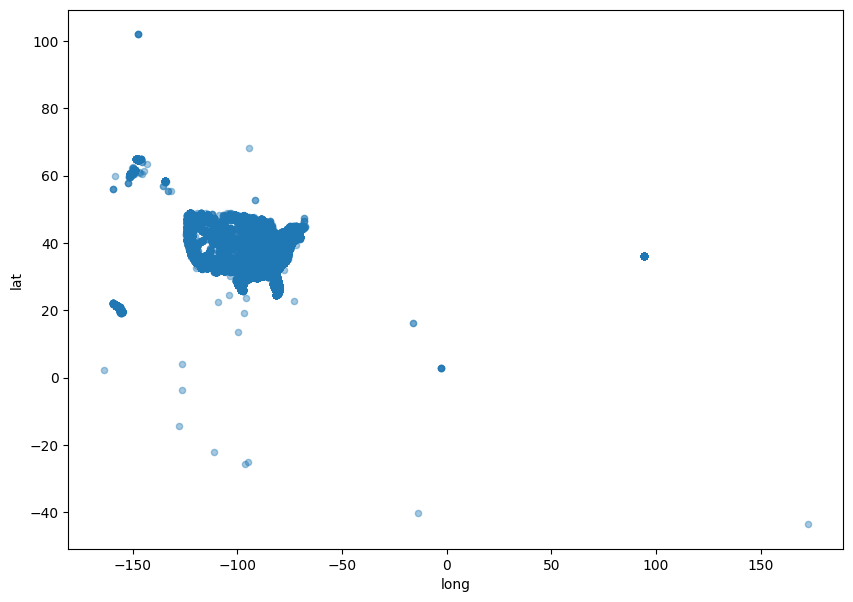

In [90]:
# scattering plot, usando las coordenadas de 'lat' y 'long', donde se nota claramente que hay varios puntos fuera
# del territorio de USA, considerando que casi todos se conglomeran en la mancha próxima a las coordenadas (-100, 40)

train.plot(kind= 'scatter', x='long', alpha=0.4, y='lat', figsize=(10, 7))

### Diagramas de correlación.

Para esto, se define una lista con las instancias que, bajo cierto criterio, se consideran adecuadas para la predicción

array([[<AxesSubplot:xlabel='beds', ylabel='beds'>,
        <AxesSubplot:xlabel='baths', ylabel='beds'>,
        <AxesSubplot:xlabel='wheelchair_access', ylabel='beds'>,
        <AxesSubplot:xlabel='electric_vehicle_charge', ylabel='beds'>,
        <AxesSubplot:xlabel='comes_furnished', ylabel='beds'>,
        <AxesSubplot:xlabel='sqfeet', ylabel='beds'>],
       [<AxesSubplot:xlabel='beds', ylabel='baths'>,
        <AxesSubplot:xlabel='baths', ylabel='baths'>,
        <AxesSubplot:xlabel='wheelchair_access', ylabel='baths'>,
        <AxesSubplot:xlabel='electric_vehicle_charge', ylabel='baths'>,
        <AxesSubplot:xlabel='comes_furnished', ylabel='baths'>,
        <AxesSubplot:xlabel='sqfeet', ylabel='baths'>],
       [<AxesSubplot:xlabel='beds', ylabel='wheelchair_access'>,
        <AxesSubplot:xlabel='baths', ylabel='wheelchair_access'>,
        <AxesSubplot:xlabel='wheelchair_access', ylabel='wheelchair_access'>,
        <AxesSubplot:xlabel='electric_vehicle_charge', ylabel='whee

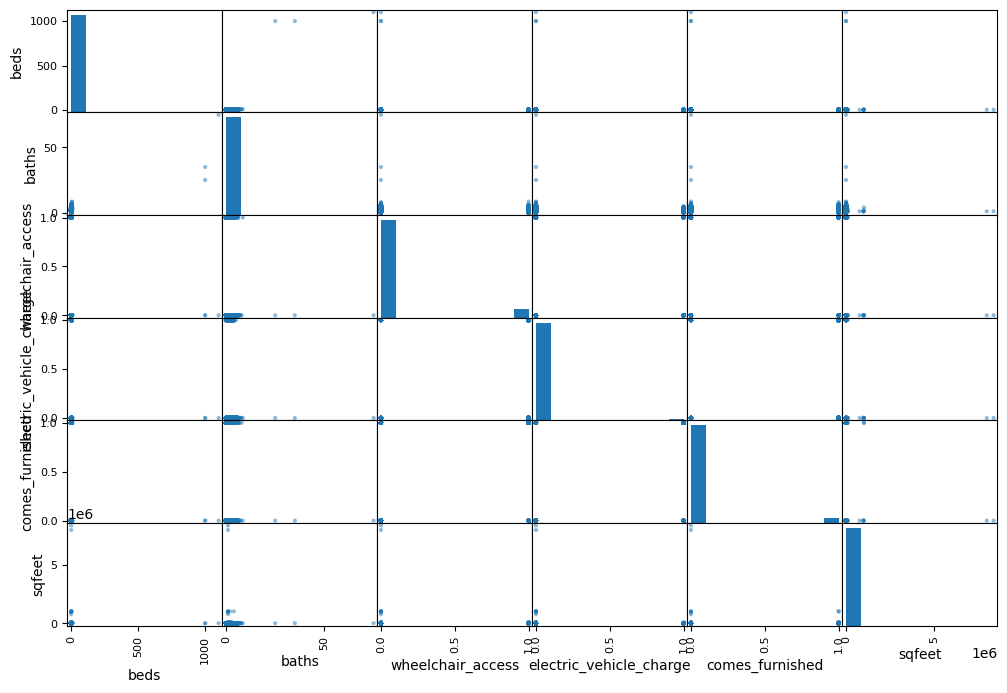

In [91]:
from pandas.plotting import scatter_matrix

cols_for_model = ['beds', 'baths','wheelchair_access', 'electric_vehicle_charge',
                  'comes_furnished', 'laundry_options',	'parking_options', 'sqfeet']

# gráfica de dispersión

scatter_matrix(train[cols_for_model], figsize=(12, 8))

### Limpieza de datos

In [92]:
# visualización de los datos nulos por cada columna
train.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             70992
parking_options            126331
image_url                       0
description                     2
lat                          1714
long                         1714
state                           0
dtype: int64

In [93]:
# datos diferentes de laundry_options, esta tiene datos nulos 
train['laundry_options'].unique()

array(['w/d in unit', 'w/d hookups', 'laundry on site', None,
       'laundry in bldg', 'no laundry on site'], dtype=object)

<AxesSubplot:>

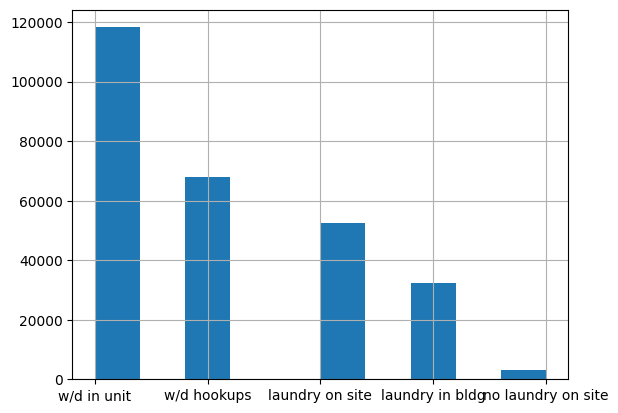

In [94]:
# Se hace un histograma para 'laundary_options'
train['laundry_options'].hist()

In [95]:
# Se obtiene la moda
train['laundry_options'].value_counts()

w/d in unit           118254
w/d hookups            67807
laundry on site        52599
laundry in bldg        32375
no laundry on site      3277
Name: laundry_options, dtype: int64

In [96]:
# Creamos la función de clasificación para la columna "category_price". Esto se hace antes de seguir con la elimina
# -ción de los datos nulos

def Clasificacion(dframe):
    if dframe['price'] <= 999:
        val = 'low'    
    elif 1000 <= dframe['price'] < 1999:
        val = 'medium'
    else:
        val = 'high'
    return val


In [97]:
# Se aplica la función para crear la columna
train['category_price'] = train.apply(Clasificacion, axis= 1)

In [98]:
# Se incluye esta nueva columna en cols_for_model
cols_for_model = ['beds', 'baths','wheelchair_access', 'electric_vehicle_charge',
                  'comes_furnished', 'laundry_options',	'parking_options', 'category_price', 'sqfeet']

C:\Users\kaod_\AppData\Local\Temp\ipykernel_17148\657202100.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = train[cols_for_model].corr().round(2)


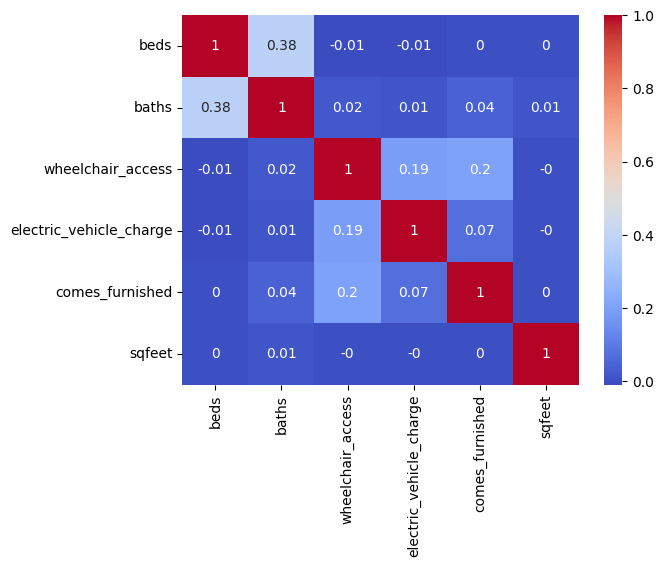

In [99]:
# Con la columna category price, se hace una matriz de correlación numérica y visual
import seaborn as sn
corrMatrix = train[cols_for_model].corr().round(2)
sn.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot:>

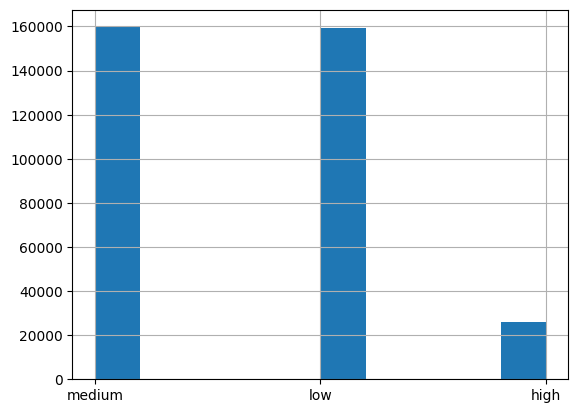

In [100]:
train['category_price'].hist(bins=10)


In [101]:
# cantidad de registros cuya categoría de precio es low
len(train[train['category_price'] == 'low' ])

159479

In [102]:
# cantidad de registros cuya categoría de precio es medium
len(train[train['category_price'] == 'medium'])

159638

In [103]:
# cantidad de registros cuya categoría de precio es high
len(train[train['category_price'] == 'high' ])

26187

In [104]:
# veamos cuál valor de laundry_options coincide más con el valor 'high' de la columna 'category_price'
print(len(train[(train.laundry_options =='w/d in unit') & (train.category_price =='high')]))
print(len(train[(train.laundry_options =='w/d hookups') & (train.category_price =='high')]))
print(len(train[(train.laundry_options =='laundry on site') & (train.category_price =='high')]))
print(len(train[(train.laundry_options =='laundry in bldg') & (train.category_price =='high')]))
print(len(train[(train.laundry_options =='no laundry on sit') & (train.category_price =='high')]))

16101
2108
2209
1713
0


In [105]:
# veamos algunos registros que tienen valor nulo en la columna laundry_options
fila_con_nan = train.isnull()['laundry_options']
fila_con_nan = train[fila_con_nan]
fila_con_nan.head()


,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price
13,7022309032,https://abilene.craigslist.org/apa/d/abilene-1...,abilene,https://abilene.craigslist.org,870,apartment,1090,2,2.0,1,...,0,0,None,None,https://images.craigslist.org/00101_1nJfH94oyv...,Bedrooms: 2 Bathrooms: 2 Price: $870 Welcome ...,32.4366,-99.7900,tx,low
22,7047055574,https://roanoke.craigslist.org/apa/d/roanoke-s...,roanoke,https://roanoke.craigslist.org,899,apartment,1021,2,1.5,0,...,0,0,None,None,https://images.craigslist.org/00W0W_jdEoEzy6Zc...,Tastefully designed apartment and townhomes wi...,37.2867,-79.9957,va,low
23,7048270828,https://chambersburg.craigslist.org/apa/d/ches...,cumberland valley,https://chambersburg.craigslist.org,1911,apartment,1378,3,2.0,0,...,0,0,None,None,https://images.craigslist.org/00o0o_g5ogc305Nw...,Aura at Towne Place\t P...,36.7352,-76.2384,md,medium
27,7038834168,https://sanmarcos.craigslist.org/apa/d/san-mar...,san marcos,https://sanmarcos.craigslist.org,555,apartment,770,1,1.0,1,...,0,0,None,None,https://images.craigslist.org/00B0B_3aR7NY42Jh...,"Here's the ideal place to live, study, and enj...",29.8754,-97.9404,tx,low
28,7027459361,https://albanyga.craigslist.org/apa/d/surprise...,albany,https://albanyga.craigslist.org,950,condo,1508,5,2.5,1,...,0,0,None,None,https://images.craigslist.org/00m0m_cAKYe6wfIZ...,BACK ON Marketplace. DELIGHTFUL 5 Sleeping roo...,42.3948,-73.9623,ga,low


<AxesSubplot:>

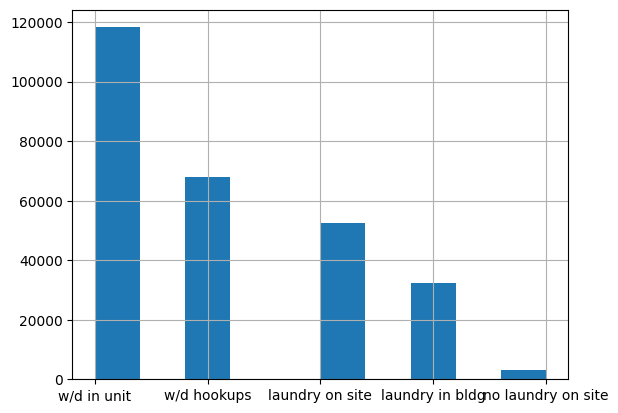

In [106]:
# la graficamos
train['laundry_options'].hist()

In [107]:
# Se llenan los campos nulos de la columna laundry_options con la moda (su valor más repetido)
train['laundry_options'].fillna('w/d in unit', inplace=True)

In [108]:
# se verifica
train.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options                 0
parking_options            126331
image_url                       0
description                     2
lat                          1714
long                         1714
state                           0
category_price                  0
dtype: int64

In [109]:
# de manera similar con la columna parking_options
fila_con_nan2 = train.isnull()['parking_options']
fila_con_nan2 = train[fila_con_nan2]
len(fila_con_nan2)


126331

<AxesSubplot:>

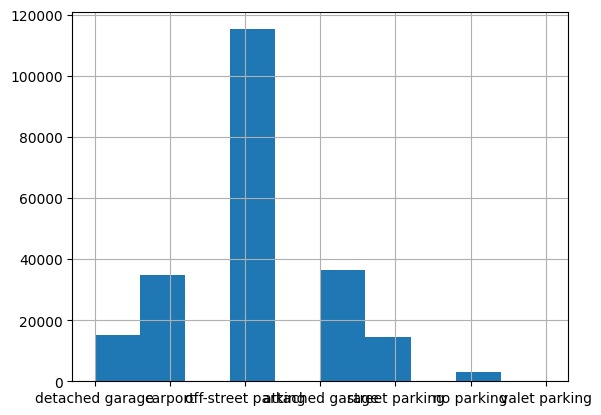

In [110]:
# se grafica parking_options con un histograma
train['parking_options'].hist()

In [111]:
# Se obtiene la moda
train['parking_options'].value_counts()

off-street parking    115185
attached garage        36328
carport                34818
detached garage        15266
street parking         14358
no parking              2875
valet parking            143
Name: parking_options, dtype: int64

In [112]:
# se usa la moda para llenar los campos nulos de esta columna
train['parking_options'].fillna('off-street parking', inplace=True)


In [113]:
# se verifica
train.isnull().sum()

id                            0
url                           0
region                        0
region_url                    0
price                         0
type                          0
sqfeet                        0
beds                          0
baths                         0
cats_allowed                  0
dogs_allowed                  0
smoking_allowed               0
wheelchair_access             0
electric_vehicle_charge       0
comes_furnished               0
laundry_options               0
parking_options               0
image_url                     0
description                   2
lat                        1714
long                       1714
state                         0
category_price                0
dtype: int64

In [114]:
# para obtener un registro en específico
registro = train[train['sqfeet'] == 8388607]
registro

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state,category_price
249237,7017516227,https://mankato.craigslist.org/apa/d/new-ulm-2...,mankato,https://mankato.craigslist.org,750,apartment,8388607,2,1.0,0,...,0,0,laundry in bldg,detached garage,https://images.craigslist.org/00w0w_nq1l2oBn6W...,"Description 2-bedroom, 1-bath unit with smal...",44.3262,-94.4804,mn,low


### Pre procesamiento de datos

In [115]:
# veamos cuantos valores diferentes de la coluna 'type' existen
train['type'].unique()

array(['house', 'apartment', 'duplex', 'loft', 'condo', 'manufactured',
       'townhouse', 'in-law', 'cottage/cabin', 'flat', 'assisted living',
       'land'], dtype=object)

In [116]:
# eliminamos las columnas que se consideran no son necesarias para estimar el valor de 'price', por el momento
train.drop(['id', 'url', 'region', 'region_url', 'price', 'type', 'cats_allowed', 
            'dogs_allowed', 'smoking_allowed', 'image_url', 'description', 'lat', 'long', 'state'], axis = 'columns', inplace=True)



In [117]:
# el dataframe sin las columnas innecesarias
train.head()

,sqfeet,beds,baths,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,category_price
0,1200,2,2.0,0,0,0,w/d in unit,detached garage,medium
1,694,1,1.0,0,0,0,w/d in unit,carport,medium
2,900,2,2.0,0,0,0,w/d hookups,off-street parking,medium
3,1469,3,2.0,0,0,0,w/d in unit,off-street parking,medium
4,700,1,1.0,0,0,0,w/d in unit,carport,low


In [118]:
# Elementos diferentes de la columna 'unique'
(train['beds'].unique())

array([   2,    1,    3,    5,    4,    0,    6,    8,    7, 1000, 1100],
      dtype=int64)

In [119]:
# Se procede a cuantizar ciertas columnas categóricas que pueden ser importantes para el entrenamiento del modelo
# la clasificación categórica de la columna 'beds' será por intervalos [0,4], de [5, 8] y x>8, se pasa a 
# una nueva columna
def beds_category(dframe):
    if dframe['beds'] <= 4:
        val = 'few beds'    
    elif 5 <= dframe['beds'] <= 8:
        val = 'some beds'
    else:
        val = 'much beds'
    return val


In [120]:
# Se aplica la funcion 'beds_categorized' a una nueva columna del dataframe train
train['beds_categorized'] = train.apply(beds_category, axis= 1)

In [49]:
train

,beds,baths,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,category_price,beds_categorized
0,2,2.0,0,0,0,w/d in unit,detached garage,medium,few beds
1,1,1.0,0,0,0,w/d in unit,carport,medium,few beds
2,2,2.0,0,0,0,w/d hookups,off-street parking,medium,few beds
3,3,2.0,0,0,0,w/d in unit,off-street parking,medium,few beds
4,1,1.0,0,0,0,w/d in unit,carport,low,few beds
...,...,...,...,...,...,...,...,...,...
346474,1,1.0,0,0,0,laundry on site,off-street parking,low,few beds
346475,2,2.0,0,0,0,w/d in unit,off-street parking,high,few beds
346476,2,2.0,0,0,0,w/d hookups,off-street parking,medium,few beds
346477,2,2.0,0,0,0,w/d in unit,detached garage,low,few beds


<AxesSubplot:>

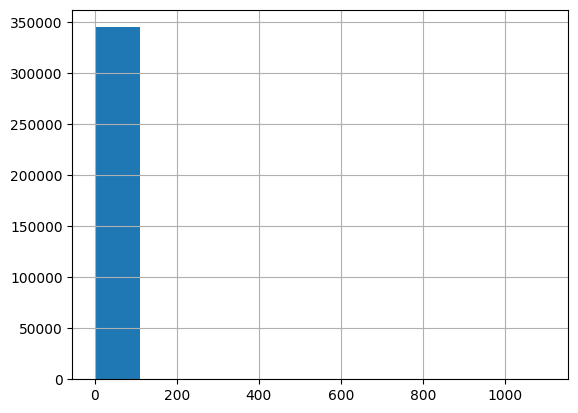

In [121]:
train['beds'].hist()

<AxesSubplot:>

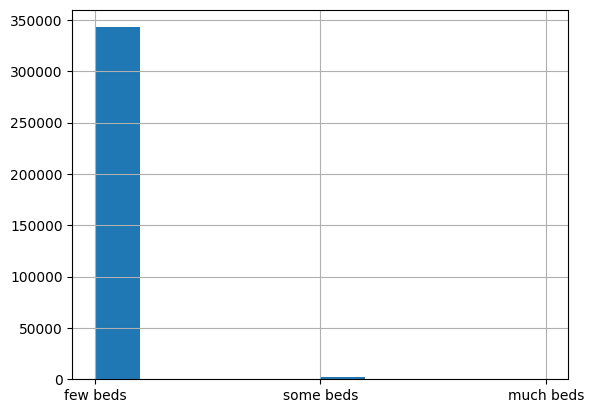

In [122]:
# se grafica ahora la nueva columna cuantizada
train['beds_categorized'].hist()

In [123]:
# se obtienen los valores
train['beds_categorized'].value_counts()

few beds     342924
some beds      2377
much beds         3
Name: beds_categorized, dtype: int64

In [124]:
# se eliminan los registros de 'much beds'
train.drop(train[(train['beds_categorized'] == 'much beds')].index, inplace=True)

In [125]:
# se obtienen los valores
train['beds_categorized'].value_counts()

few beds     342924
some beds      2377
Name: beds_categorized, dtype: int64

In [126]:
# ahora para la columna 'baths'
train['baths'].value_counts()

1.0    177629
2.0    120993
1.5     24472
2.5     11764
3.0      4960
0.0      2828
4.0      1351
3.5       895
4.5       210
5.0       114
5.5        51
6.0        25
6.5         4
7.0         2
7.5         1
8.0         1
8.5         1
Name: baths, dtype: int64

In [127]:
# como existen solo doce registros con más de 6 baños y medio (cerca del 0.05 % del total de registros),
# se procede a elminarlos

train.drop(train[(train['baths'] >= 6.5)].index, inplace=True)

In [128]:
train['baths'].value_counts()

1.0    177629
2.0    120993
1.5     24472
2.5     11764
3.0      4960
0.0      2828
4.0      1351
3.5       895
4.5       210
5.0       114
5.5        51
6.0        25
Name: baths, dtype: int64

In [129]:
# dada esta distribución, se categorizará en tres partes: de 0.0 a 3.0, de 3.5 a 6, como sigue:
def baths_category(dframe):
    if dframe['baths'] <= 3.0:
        val = 'few baths'    
    else:
        val = 'much baths'
    return val


In [130]:
# se aplica la función a train, creando una nueva columna llamada 'baths_categorized
train['baths_categorized'] = train.apply(baths_category, axis= 1)


In [131]:
train

,sqfeet,beds,baths,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,category_price,beds_categorized,baths_categorized
0,1200,2,2.0,0,0,0,w/d in unit,detached garage,medium,few beds,few baths
1,694,1,1.0,0,0,0,w/d in unit,carport,medium,few beds,few baths
2,900,2,2.0,0,0,0,w/d hookups,off-street parking,medium,few beds,few baths
3,1469,3,2.0,0,0,0,w/d in unit,off-street parking,medium,few beds,few baths
4,700,1,1.0,0,0,0,w/d in unit,carport,low,few beds,few baths
...,...,...,...,...,...,...,...,...,...,...,...
346474,660,1,1.0,0,0,0,laundry on site,off-street parking,low,few beds,few baths
346475,1099,2,2.0,0,0,0,w/d in unit,off-street parking,high,few beds,few baths
346476,1104,2,2.0,0,0,0,w/d hookups,off-street parking,medium,few beds,few baths
346477,1050,2,2.0,0,0,0,w/d in unit,detached garage,low,few beds,few baths


In [132]:
train['laundry_options'].value_counts()

w/d in unit           189238
w/d hookups            67807
laundry on site        52598
laundry in bldg        32372
no laundry on site      3277
Name: laundry_options, dtype: int64

In [133]:
train['parking_options'].value_counts()

off-street parking    241512
attached garage        36323
carport                34816
detached garage        15266
street parking         14357
no parking              2875
valet parking            143
Name: parking_options, dtype: int64

In [134]:
# se eliminan las columnas 'beds' y baths
train = train.drop(columns=['beds'])
train = train.drop(columns=['baths'])

In [135]:
train.head()

,sqfeet,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,category_price,beds_categorized,baths_categorized
0,1200,0,0,0,w/d in unit,detached garage,medium,few beds,few baths
1,694,0,0,0,w/d in unit,carport,medium,few beds,few baths
2,900,0,0,0,w/d hookups,off-street parking,medium,few beds,few baths
3,1469,0,0,0,w/d in unit,off-street parking,medium,few beds,few baths
4,700,0,0,0,w/d in unit,carport,low,few beds,few baths


In [138]:
# para categorizar se usa onehotEncoder
from sklearn.preprocessing import OneHotEncoder

#para laundry options
coder_nominal_lo = OneHotEncoder(sparse=False)
coder_nominal_lo.fit_transform(train[['laundry_options']])

C:\Users\kaod_\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [139]:
# para parking options

coder_nominal_po = OneHotEncoder(sparse=False)
coder_nominal_po.fit_transform(train[['parking_options']])

C:\Users\kaod_\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [140]:
# para category_price
coder_nominal_cp = OneHotEncoder(sparse=False)
coder_nominal_cp.fit_transform(train[['category_price']])

C:\Users\kaod_\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [141]:
# beds_categorized
coder_nominal_bc = OneHotEncoder(sparse=False)
coder_nominal_bc.fit_transform(train[['beds_categorized']])

C:\Users\kaod_\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [142]:
# baths_categorized
coder_nominal_bac = OneHotEncoder(sparse=False)
coder_nominal_bac.fit_transform(train[['baths_categorized']])

C:\Users\kaod_\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])